In [1]:
!pip install transformers

In [2]:
from transformers import AutoTokenizer, pipeline, VisionEncoderDecoderModel, ViTImageProcessor
from PIL import Image

2024-07-26 03:09:06.618404: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 03:09:06.618581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 03:09:06.769131: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Image context retrieval

In [3]:
import requests

processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [4]:
img_url = 'https://previews.123rf.com/images/leaf/leaf1110/leaf111000550/11048130-group-of-happy-business-people-walking-together-on-street.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

In [5]:
gen_kwargs = {'max_length': 30, 'num_beams': 4}

inputs = processor(raw_image, return_tensors="pt").pixel_values

out = model.generate(inputs, **gen_kwargs)
preds = tokenizer.batch_decode(out, skip_special_tokens = True)[0].strip()
preds

The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


'a man and a woman are walking down the street'

# OCR

## EasyOCR

In [6]:
!pip install easyocr


In [7]:
img_url = 'https://i.redd.it/vxw5nl13u3261.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

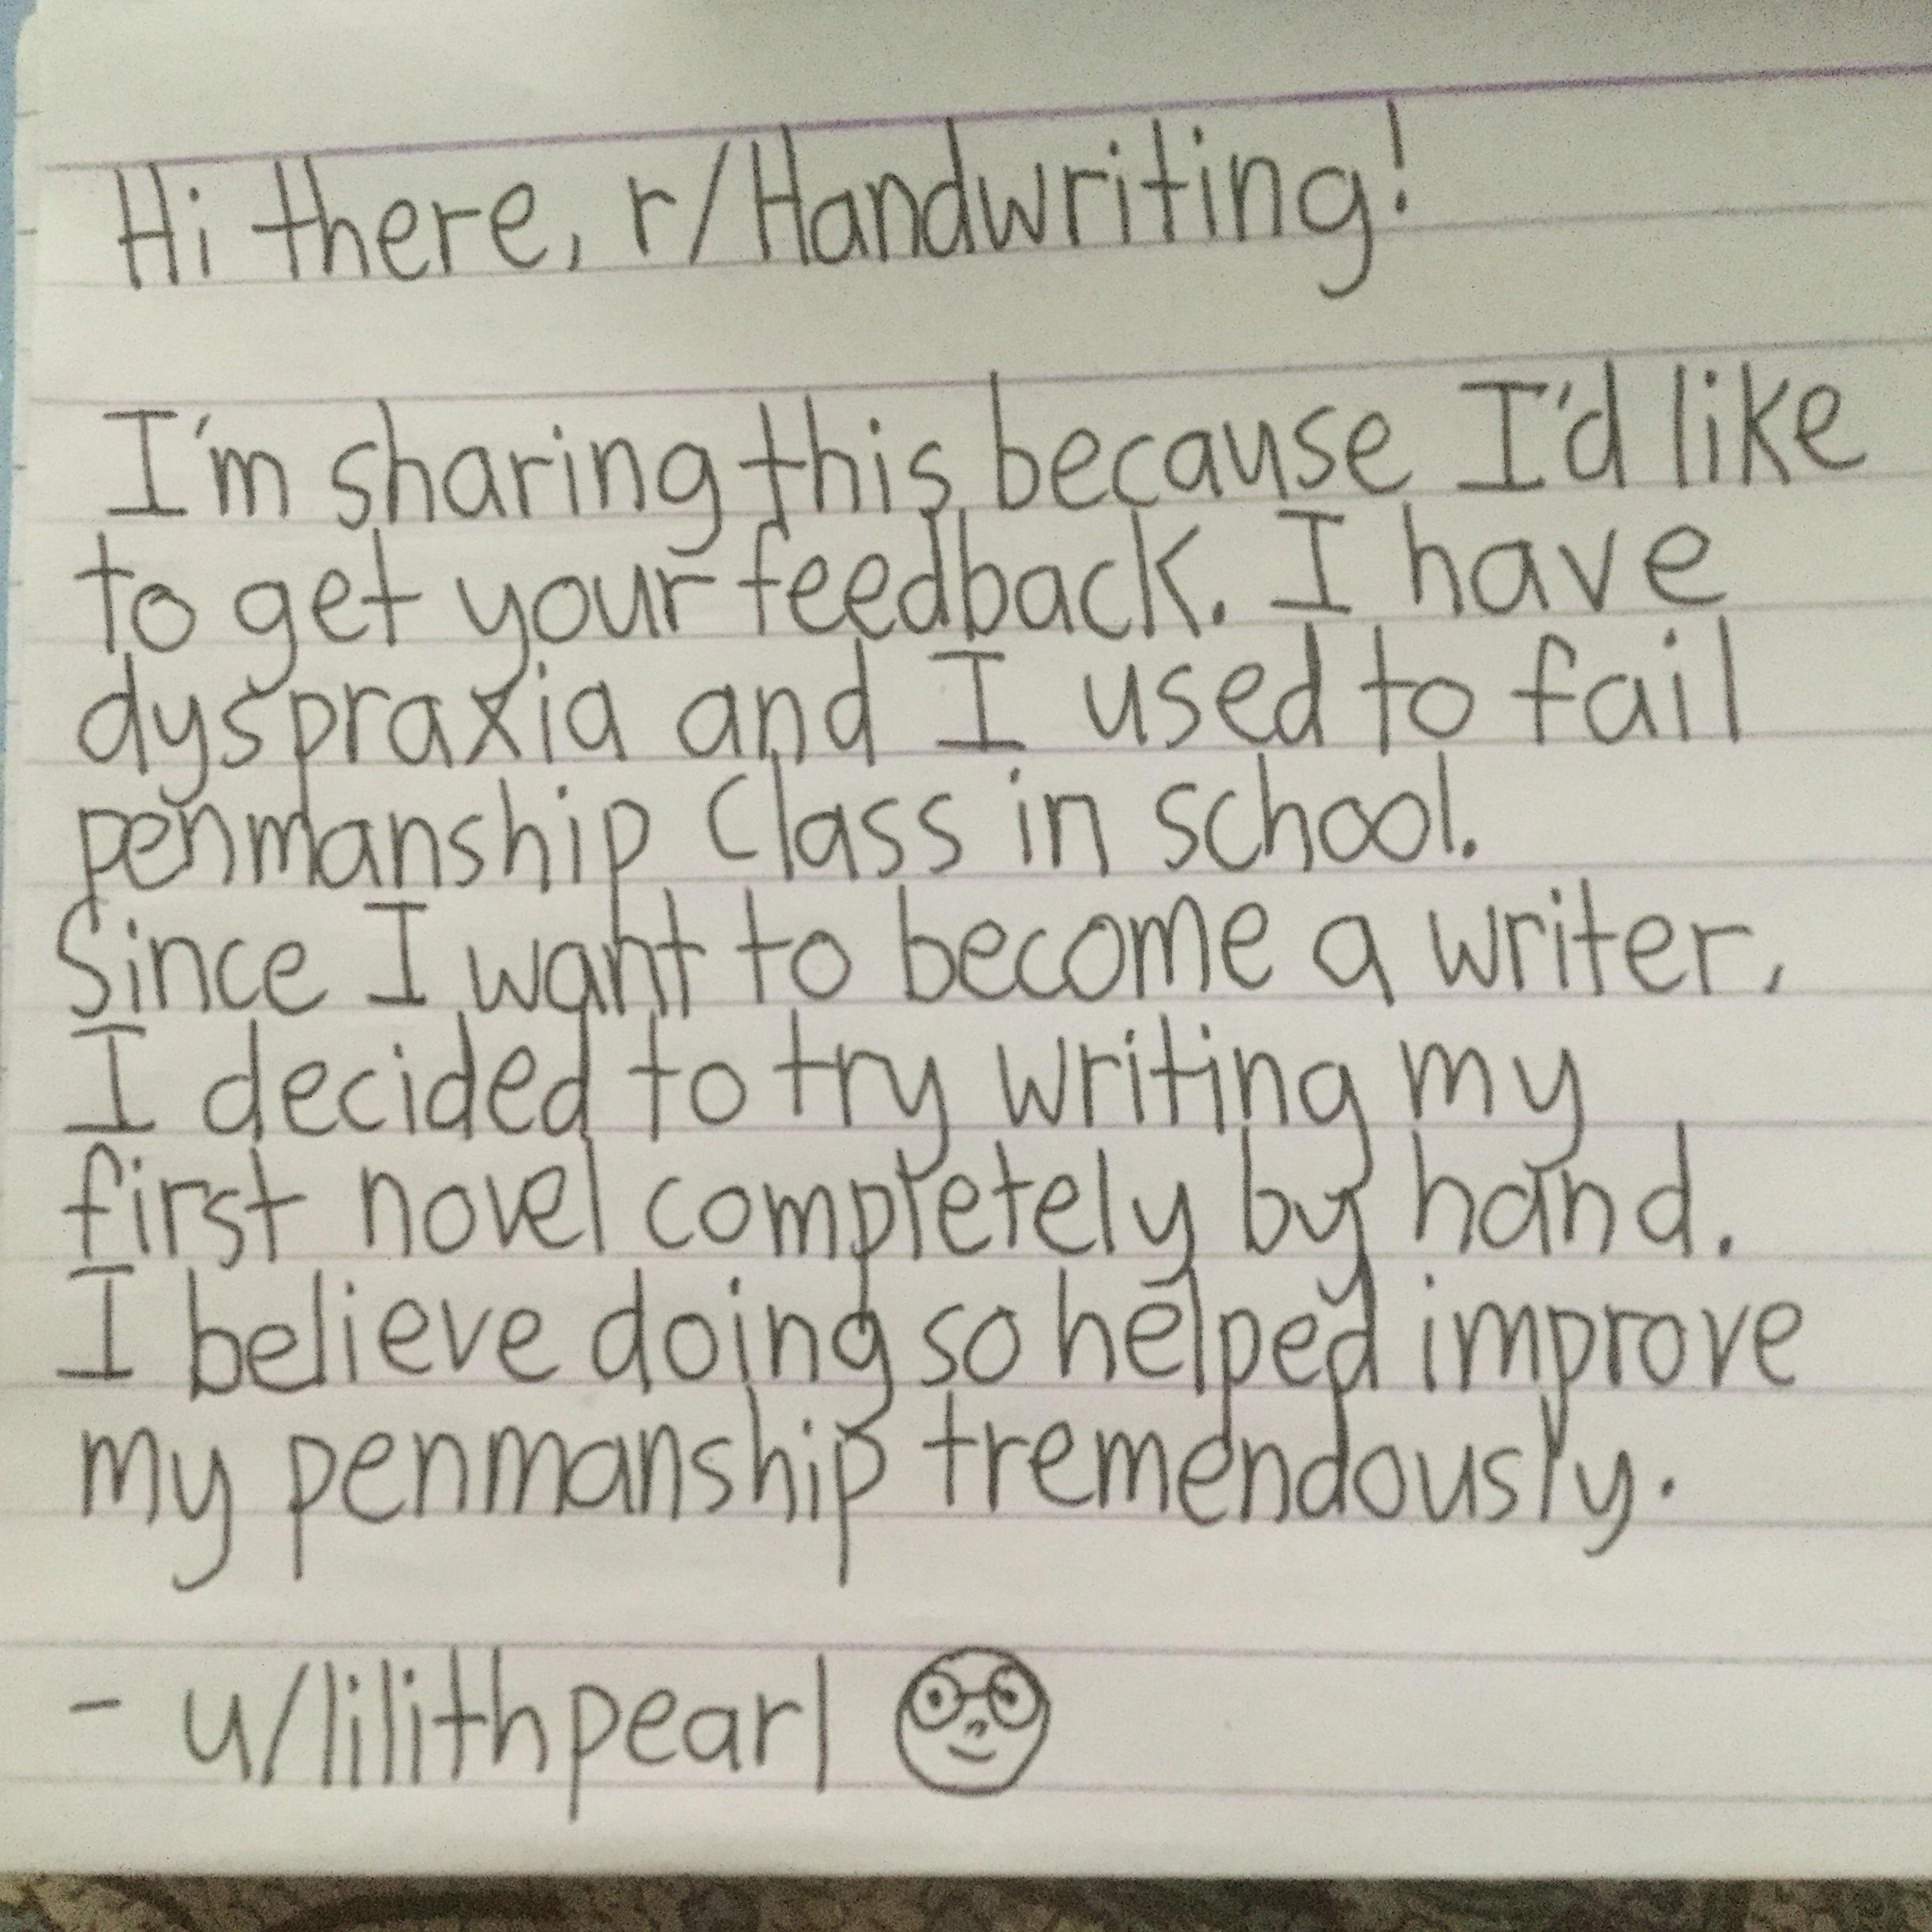

In [8]:
raw_image

In [9]:
import easyocr
import numpy as np

reader = easyocr.Reader(['en'])
result = reader.readtext(np.array(raw_image))

In [10]:
text_result = ""
for r in result:
    text_result = text_result + " " + r[1]
print(text_result)

 Hithere rl Hardwriting' Im sharing because Td like to teabefav Ihave Xaa 1 usedto fail POmanship Class in School, Since I to becone q Writer; decided to tr Writina mu Erse noil comptetelu hclnd , I believe doing So iyprove penmship #ueeracuspyo W/lilithpear) dosra and Wqht 6 mu
